In [72]:
import skimage
from skimage import morphology as mph
from skimage import io

from matplotlib import pyplot as plt
import numpy as np
from skimage.util import img_as_ubyte

In [78]:
path_bin_image = 'i3.png'
image = img_as_ubyte(io.imread("i3.png", as_binary = True))


###  Структурирующие элементы, использующиеся в алгоритме построения  оболочки множества .

In [36]:
s1 = [
    [1,1,1],
    [0,0,1],
    [0,0,0]
]
s2 = [
    [0,0,0],
    [0,1,0],
    [0,0,0]
]
s1 = np.array(s1,dtype=np.uint8)
s2 = np.array(s2,dtype=np.uint8)

structs2 = []
for i in range(4):
    structs2.append((s1,s2))
    s1 = np.rot90(s1)
    s2 = np.rot90(s2)
    
s1 = [
    [1,1,1],
    [1,0,0],
    [0,0,0]
]
s2 = [
    [0,0,0],
    [0,1,0],
    [0,0,0]
]
s1 = np.array(s1,dtype=np.uint8)
s2 = np.array(s2,dtype=np.uint8)


for i in range(4):
    structs2.append((s1,s2))
    s1 = np.rot90(s1)
    s2 = np.rot90(s2)

###  Структурирующие элементы, использующиеся в алгоритме построения скелета

In [ ]:
s1 = [
    [1,1,1],
    [0,1,0],
    [0,0,0]
]
s2 = [
    [0,0,0],
    [0,0,0],
    [1,1,1]
]
s1 = np.array(s1,dtype=np.uint8)
s2 = np.array(s2,dtype=np.uint8)

structs = []
for i in range(4):
    structs.append((s1,s2))
    s1 = np.rot90(s1)
    s2 = np.rot90(s2)
    
s1 = [
    [0,1,0],
    [0,1,1],
    [0,0,0]
]
s2 = [
    [0,0,0],
    [1,0,0],
    [1,1,0]
]
s1 = np.array(s1,dtype=np.uint8)
s2 = np.array(s2,dtype=np.uint8)


for i in range(4):
    structs.append((s1,s2))
    s1 = np.rot90(s1)
    s2 = np.rot90(s2)

## Операции утолщение и утоньшение


In [59]:
def hitmiss(img,struct1,struct2):
    eroded = mph.erosion(img,struct1)
    rev = 255 - img
    return eroded & mph.erosion(rev,struct2)

def thinning(img):
    temp = img
    for s1,s2 in structs:
        temp -= hitmiss(temp,s1,s2)
        
    return temp

def thickening(img):
    temp = img
    for s1,s2 in structs2:
        temp |= hitmiss(temp,s1,s2)
    return temp

## Скелет

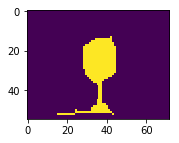

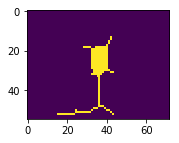

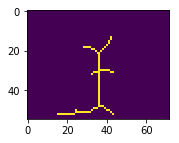

In [105]:

res = np.array(image)
n = 0
temp = []
temp_res = np.zeros(image.shape)
while np.count_nonzero(temp_res - res) > 0:
    temp_res = np.array(res)
    res = thinning(res)
    if n % 4 == 0:
        plt.figure(figsize=(3, 2))
        plt.imshow(res)
        plt.show()
    temp.append(temp_res)
    n+=1

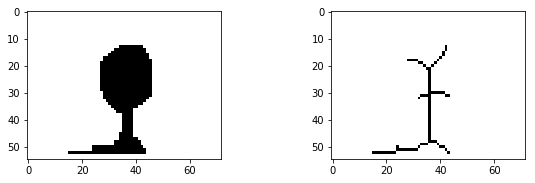

In [106]:
plt.figure(figsize=(10, 6))
plt.subplot(221)
plt.imshow(image, cmap=cm.binary)
plt.subplot(222)
plt.imshow(res, cmap=cm.binary)

plt.show()

## Выпуклая оболочка

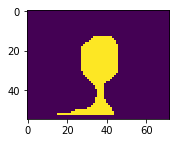

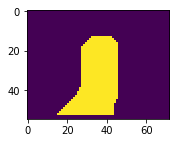

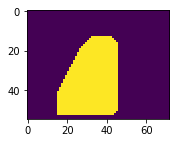

In [95]:

res = np.array(image)
n = 0
temp = []
temp_res = np.zeros(image.shape)
while np.count_nonzero(temp_res - res) > 0:
    temp_res = np.array(res)
    res = thickening(res)
    if n % 20 == 0:
        plt.figure(figsize=(3, 2))
        plt.imshow(res)
        plt.show()
    temp.append(temp_res)
    n+=1

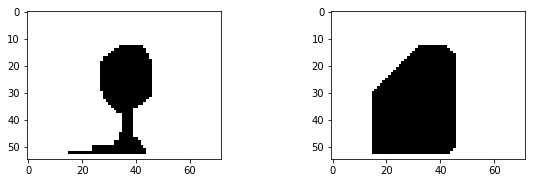

In [102]:
plt.figure(figsize=(10, 6))
plt.subplot(221)
plt.imshow(image, cmap=cm.binary)
plt.subplot(222)
plt.imshow(res, cmap=cm.binary)

plt.show()